<a href="https://colab.research.google.com/github/Nov05/Google-Colaboratory/blob/master/20230814_huggingface_transformer_BERT_encoder_only.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

notebook created by nov05 on 2023-08-14

# **\<begin\>**    

* models: huggingface [bert-base-uncased](https://huggingface.co/bert-base-uncased)  
* datasets: Kaggle [English Language Learning](https://www.kaggle.com/competitions/feedback-prize-english-language-learning)  
Evaluating language knowledge of ELL students from grades 8-12

* 👉 my EDA [Colab notebook](https://colab.research.google.com/drive/13jOoK9ANKtslem3BCY-yQaXjU_-H-bT3)  

In [ ]:
!nvidia-smi

Mon Sep 11 01:45:30 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# **model structure**

In [ ]:
model = AutoModel.from_pretrained(config['model'])

In [ ]:
print(type(model.base_model))
model.base_model

<class 'transformers.models.bert.modeling_bert.BertModel'>


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

## **get the last a few layers**  

In [ ]:
## get the last a few layers
last_6_layers = torch.nn.ModuleList(model.base_model.encoder.layer[-6:]).to(config['device'])
last_6_layers

ModuleList(
  (0-5): 6 x BertLayer(
    (attention): BertAttention(
      (self): BertSelfAttention(
        (query): Linear(in_features=768, out_features=768, bias=True)
        (key): Linear(in_features=768, out_features=768, bias=True)
        (value): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (output): BertSelfOutput(
        (dense): Linear(in_features=768, out_features=768, bias=True)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (intermediate): BertIntermediate(
      (dense): Linear(in_features=768, out_features=3072, bias=True)
      (intermediate_act_fn): GELUActivation()
    )
    (output): BertOutput(
      (dense): Linear(in_features=3072, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
)

In [ ]:
print(model.base_model.parameters())

<generator object Module.parameters at 0x7aec53d99540>


In [ ]:
param =next(model.base_model.parameters())
print(param.shape)
param

torch.Size([30522, 768])


Parameter containing:
tensor([[-0.0102, -0.0615, -0.0265,  ..., -0.0199, -0.0372, -0.0098],
        [-0.0117, -0.0600, -0.0323,  ..., -0.0168, -0.0401, -0.0107],
        [-0.0198, -0.0627, -0.0326,  ..., -0.0165, -0.0420, -0.0032],
        ...,
        [-0.0218, -0.0556, -0.0135,  ..., -0.0043, -0.0151, -0.0249],
        [-0.0462, -0.0565, -0.0019,  ...,  0.0157, -0.0139, -0.0095],
        [ 0.0015, -0.0821, -0.0160,  ..., -0.0081, -0.0475,  0.0753]],
       requires_grad=True)

## **shapes of model.base_model.parameters()**

In [ ]:
for param in model.base_model.parameters():
    print(param.shape)

torch.Size([30522, 768])
torch.Size([512, 768])
torch.Size([2, 768])
torch.Size([768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([768])
torch.Size([768])
torch.Size([3072, 768])
torch.Size([3072])
torch.Size([768, 3072])
torch.Size([768])
torch.Size([768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([768])
torch.Size([768])
torch.Size([3072, 768])
torch.Size([3072])
torch.Size([768, 3072])
torch.Size([768])
torch.Size([768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([768, 768])
torch.Size([768])
torch.Size([768])
torch.Size([768])
torch.Size([3072, 768])
torch.Size([3072])
torch.Size

## **attributes of bert model.base_model**  

In [ ]:
dir(model.base_model)

['T_destination',
 '__annotations__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_apply',
 '_auto_class',
 '_backward_compatibility_gradient_checkpointing',
 '_backward_hooks',
 '_backward_pre_hooks',
 '_buffers',
 '_call_impl',
 '_convert_head_mask_to_5d',
 '_create_repo',
 '_dispatch_accelerate_model',
 '_expand_inputs_for_generation',
 '_extract_past_from_model_output',
 '_forward_hooks',
 '_forward_hooks_with_kwargs',
 '_forward_pre_hooks',
 '_forward_pre_hooks_with_kwargs',
 '_from_config',
 '_get_backward_hooks',
 '_get_backward_pre_hooks',
 '_get_decoder_start_token_id',
 '_get_files_timestamps',
 '_get_generat

## **model.base_model.named_modules()**  

In [ ]:
for m in model.base_model.named_modules():
    print(m)
    break

('', BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [ ]:
model.base_model.main_input_name

'input_ids'

In [ ]:
for i,p in enumerate(model.base_model.named_parameters()):
    print(p)
    if i==1: break

('embeddings.word_embeddings.weight', Parameter containing:
tensor([[-0.0102, -0.0615, -0.0265,  ..., -0.0199, -0.0372, -0.0098],
        [-0.0117, -0.0600, -0.0323,  ..., -0.0168, -0.0401, -0.0107],
        [-0.0198, -0.0627, -0.0326,  ..., -0.0165, -0.0420, -0.0032],
        ...,
        [-0.0218, -0.0556, -0.0135,  ..., -0.0043, -0.0151, -0.0249],
        [-0.0462, -0.0565, -0.0019,  ...,  0.0157, -0.0139, -0.0095],
        [ 0.0015, -0.0821, -0.0160,  ..., -0.0081, -0.0475,  0.0753]],
       requires_grad=True))
('embeddings.position_embeddings.weight', Parameter containing:
tensor([[ 1.7505e-02, -2.5631e-02, -3.6642e-02,  ...,  3.3437e-05,
          6.8312e-04,  1.5441e-02],
        [ 7.7580e-03,  2.2613e-03, -1.9444e-02,  ...,  2.8910e-02,
          2.9753e-02, -5.3247e-03],
        [-1.1287e-02, -1.9644e-03, -1.1573e-02,  ...,  1.4908e-02,
          1.8741e-02, -7.3140e-03],
        ...,
        [ 1.7418e-02,  3.4903e-03, -9.5621e-03,  ...,  2.9599e-03,
          4.3435e-04, -2.

## **model.encoder.layer**  

In [ ]:
model.encoder.layer

ModuleList(
  (0-11): 12 x BertLayer(
    (attention): BertAttention(
      (self): BertSelfAttention(
        (query): Linear(in_features=768, out_features=768, bias=True)
        (key): Linear(in_features=768, out_features=768, bias=True)
        (value): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (output): BertSelfOutput(
        (dense): Linear(in_features=768, out_features=768, bias=True)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (intermediate): BertIntermediate(
      (dense): Linear(in_features=768, out_features=3072, bias=True)
      (intermediate_act_fn): GELUActivation()
    )
    (output): BertOutput(
      (dense): Linear(in_features=3072, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
)

## **the last 3 layers of a model's encoder**  

In [ ]:
model.encoder.layer[-3:]

ModuleList(
  (0-2): 3 x BertLayer(
    (attention): BertAttention(
      (self): BertSelfAttention(
        (query): Linear(in_features=768, out_features=768, bias=True)
        (key): Linear(in_features=768, out_features=768, bias=True)
        (value): Linear(in_features=768, out_features=768, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
      (output): BertSelfOutput(
        (dense): Linear(in_features=768, out_features=768, bias=True)
        (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (dropout): Dropout(p=0.1, inplace=False)
      )
    )
    (intermediate): BertIntermediate(
      (dense): Linear(in_features=768, out_features=3072, bias=True)
      (intermediate_act_fn): GELUActivation()
    )
    (output): BertOutput(
      (dense): Linear(in_features=3072, out_features=768, bias=True)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
)

In [ ]:
!pip install transformers
## Installing collected packages: tokenizers, safetensors, huggingface-hub, transformers
## Successfully installed huggingface-hub-0.16.4 safetensors-0.3.2 tokenizers-0.13.3 transformers-4.31.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from transformers import AutoModel
from transformers import AutoTokenizer
import gc
from tqdm.notebook import tqdm

import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# **Hyperparameters**  

In [ ]:
config = {
    ## 使用的模型为 'bert-base-uncased'，表示使用的是预训练的 BERT 模型，且文本已经被转换为小写形式（uncased）
    'model': 'bert-base-uncased',

    ## 丢弃率为 0，即不使用 dropout 层，因为对于回归任务，丢弃率不利
    'dropout': 0.,

    ## 最大序列长度为 512，将文章的长度截断或填充至最大长度
    'max_length': 512,

    ## 批大小为 16，每次训练使用的样本数
    'batch_size': 16,

    ## 训练的总轮数为 4，即对整个数据集进行 4 轮训练
    'epochs': 4,

    ## 冻结编码器时的学习率为 4e-4，即编码器参数不进行更新的学习率
    'freeze_lr': 4e-4,

    ## 解冻编码器时的学习率为 2e-5，即编码器参数开始进行更新的学习率
    'unfreeze_lr': 2e-5,

    ## 设备选择为 'cuda'，如果可用的话使用 GPU 进行训练，否则使用 CPU
    'device': 'cuda' if torch.cuda.is_available() else 'cpu',

    ## 使用 CosineAnnealingWarmRestarts 调度器，这是一种学习率调整策略，有利于训练稳定性
    'scheduler': 'CosineAnnealingWarmRestarts'
}

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(config['model'])

# **Datasets**  

EssayDataset 类是一个自定义的 PyTorch 数据集，用于处理文本数据，并将其转换为模型所需的输入格式。在 init 方法中，它接收一个 DataFrame 存储文本数据，还接收一些配置参数和 tokenizer 对象。在 getitem 方法中，它会将原始文本转换为 tokens，并根据是否为测试数据集返回不同的数据格式。最后 len 方法返回数据集中的样本数量。

In [ ]:
class EssayDataset:
    def __init__(self, df, config, tokenizer=None, is_test=False):
        """
        构造函数，初始化数据集对象
        参数:
            - df: DataFrame，存储文本数据的数据帧
            - config: 字典，包含配置参数的字典
            - tokenizer: tokenizer 对象，用于将文本转换为 tokens
            - is_test: 布尔值，指示是否为测试数据集
        """
        ## 将输入的 DataFrame 进行重置索引，并保存在对象的成员变量 df 中
        self.df = df.reset_index(drop=True)

        ## 存储不同类型得分的标签列表
        self.classes = ['cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']

        ## 设置最大序列长度，根据传入的配置参数config
        self.max_len = config['max_length']

        ## 设置tokenizer对象，用于将文本转换为tokens
        self.tokenizer = tokenizer

        ## 是否为测试数据集的标识
        self.is_test = is_test

    def __getitem__(self, idx):
        """
        获取指定索引idx对应的样本
        参数:
            - idx: 整数，样本的索引
        返回:
            - inputs: 包含输入信息的字典，其中包括input_ids, token_type_ids和attention_mask
            - targets: 包含目标信息的字典，其中包括labels
        """
        ## 获取指定索引对应的原始文本
        sample = self.df['full_text'][idx]

        ## 使用 tokenizer 对原始文本进行编码，得到包含 input_ids, token_type_ids 和 attention_mask 的 tokenized 字典
        tokenized = self.tokenizer.encode_plus(sample,
                                               None,
                                               add_special_tokens=True,
                                               max_length=self.max_len,
                                               truncation=True,
                                               padding='max_length'
                                              )

        ## 构造 inputs 字典，将编码后的 tokens 转换为 PyTorch 张量
        inputs = {
            "input_ids": torch.tensor(tokenized['input_ids'], dtype=torch.long),
            "token_type_ids": torch.tensor(tokenized['token_type_ids'], dtype=torch.long),
            "attention_mask": torch.tensor(tokenized['attention_mask'], dtype=torch.long)
        }

        ## 如果是测试数据集，直接返回 inputs 字典
        if self.is_test==True:
            return inputs

        ## 否则，获取对应样本的标签，并构造 targets 字典，将标签转换为 PyTorch 张量
        labels = self.df.loc[idx, self.classes].to_list()
        targets = {
            "labels": torch.tensor(labels, dtype=torch.float32),
        }

        return inputs, targets

    def __len__(self):
        """
        获取数据集的样本数量
        返回:
            - 数据集的样本数量，整数
        """
        return len(self.df)

In [ ]:
url_train = 'https://drive.google.com/uc?id=1qa31ST7FgmgcaZaEwu3K2AKyu_8AnHZL'
url_test = 'https://drive.google.com/uc?id=1KmhuKX_0ilDhhkANzupapT4l9SH4DHCD'
url_submission = 'https://drive.google.com/uc?id=1LXITrcbWR51Ej2nyMxI5UpqLA5kq1hJ0'
df = pd.read_csv(url_train) ## will be split into train_df and val_df later
test_df = pd.read_csv(url_test)
print(df.columns.to_list())
print(test_df.columns.to_list())

['text_id', 'full_text', 'cohesion', 'syntax', 'vocabulary', 'phraseology', 'grammar', 'conventions']
['text_id', 'full_text']


In [ ]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
print('shapes:', train_df.shape, val_df.shape)

shapes: (3128, 8) (783, 8)


In [ ]:
## 创建训练数据集 train_ds，使用 EssayDataset 类来处理 train_df 数据帧
## 使用之前定义的配置参数 config，以及已经加载的 tokenizer 对象
train_ds = EssayDataset(train_df, config, tokenizer=tokenizer)

## 创建验证数据集 val_ds，使用 EssayDataset 类来处理 val_df 数据帧
## 使用相同的配置参数 config 和 tokenizer 对象
val_ds = EssayDataset(val_df, config, tokenizer=tokenizer)

## 创建测试数据集 test_ds，使用 EssayDataset 类来处理 test_df 数据帧
## 使用相同的配置参数 config 和 tokenizer 对象，并将 is_test 设置为 True，以便区分测试数据集
test_ds = EssayDataset(test_df, config, tokenizer=tokenizer, is_test=True)

In [ ]:
## 返回的是训练数据集中第一个样本的 input_ids 的形状。
train_ds[0][0]['input_ids'].shape

torch.Size([512])

In [ ]:
## input_ids 是 BERT 模型中的一个输入特征，它是将原始文本转换为对应的 token IDs 的一维张量。
## 在 BERT 中，文本被分为一系列 token，并且每个 token 都对应着一个唯一的整数 ID。

## 创建训练数据加载器 train_loader，用于将训练数据集 train_ds 分批加载到模型进行训练
## 参数：
##   - train_ds：训练数据集对象
##   - batch_size：批大小，即每个批次包含的样本数量，从之前的配置参数 config 中获取
##   - shuffle：是否对数据进行洗牌，即打乱顺序
##   - num_workers：使用多少个进程来加载数据，这里设置为 2
##   - pin_memory：是否将内存锁定，以加速数据传输到 GPU
train_loader = torch.utils.data.DataLoader(train_ds,
                                           batch_size=config['batch_size'],
                                           shuffle=True,
                                           num_workers=2,
                                           pin_memory=True
                                          )

## 创建验证数据加载器 val_loader，用于将验证数据集 val_ds 分批加载到模型进行验证
## 参数与 train_loader 相同
val_loader = torch.utils.data.DataLoader(val_ds,
                                         batch_size=config['batch_size'],
                                         shuffle=True,
                                         num_workers=2,
                                         pin_memory=True
                                        )

In [ ]:
print('loader shapes:', len(train_loader), len(val_loader))

loader shapes: 196 49


# **Trainer**  

In [ ]:
class Trainer:
    def __init__(self, model, loaders, config, freeze=True):
        self.model = model
        self.train_loader, self.val_loader = loaders
        self.config = config
        self.input_keys = ['input_ids','token_type_ids', 'attention_mask']

        self.loss_fn = nn.SmoothL1Loss()

        if freeze:
            self.lr = self.config['freeze_lr']
        else:
            self.lr = self.config['unfreeze_lr']

        self.optim = self._get_optim()

        self.scheduler_options = {
            'CosineAnnealingWarmRestarts': torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(self.optim, T_0=5,eta_min=1e-7),
            'ReduceLROnPlateau': torch.optim.lr_scheduler.ReduceLROnPlateau(self.optim, 'min', min_lr=1e-7),
            'StepLR': torch.optim.lr_scheduler.StepLR(self.optim,step_size=2)
        }

        self.scheduler = self.scheduler_options[self.config['scheduler']]

        self.train_losses = []
        self.val_losses = []
        self.val_mcrmse = []

    def _get_optim(self):
        no_decay = ['bias', 'LayerNorm.weight']
        optimizer_grouped_parameters = [
            {'params': [p for n, p in self.model.named_parameters() if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
            {'params': [p for n, p in self.model.named_parameters() if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
        ]
        optimizer = torch.optim.AdamW(optimizer_grouped_parameters, lr=self.lr)
        return optimizer


    def mcrmse(self, outputs, targets):
        colwise_mse = torch.mean(torch.square(targets - outputs), dim=0)
        loss = torch.mean(torch.sqrt(colwise_mse), dim=0)
        return loss

    def train_one_epoch(self, epoch):
        running_loss = 0.
        progress = tqdm(self.train_loader, total=len(self.train_loader))

        for i,(inputs,targets) in enumerate(progress):

            self.optim.zero_grad()

            inputs = {k:inputs[k].to(device=config['device']) for k in inputs.keys()}
            targets = targets['labels'].to(device=config['device'])

            outputs = self.model(inputs)

            loss = self.loss_fn(outputs, targets)
            running_loss += loss.item()

            loss.backward()
            self.optim.step()

            if self.config['scheduler']=='CosineAnnealingWarmRestarts':
                self.scheduler.step(epoch-1+i/len(self.train_loader)) # as per pytorch docs

            del inputs, targets, outputs, loss

        if self.config['scheduler']=='StepLR':
            self.scheduler.step()

        train_loss = running_loss/len(self.train_loader)
        self.train_losses.append(train_loss)

    @torch.no_grad()
    def valid_one_epoch(self, epoch):
        running_loss = 0.
        running_mcrmse = 0.
        progress = tqdm(self.val_loader, total=len(self.val_loader))

        for (inputs, targets) in progress:

            inputs = {k:inputs[k].to(device=config['device']) for k in inputs.keys()}
            targets = targets['labels'].to(device=config['device'])

            outputs = self.model(inputs)

            loss = self.loss_fn(outputs, targets)
            running_loss += loss.item()

            running_mcrmse += self.mcrmse(outputs, targets).item()

            del inputs, targets, outputs, loss


        val_loss = running_loss/len(self.val_loader)
        self.val_losses.append(val_loss)

        self.val_mcrmse.append(running_mcrmse/len(self.val_loader))
        del running_mcrmse

        if config['scheduler'] == 'ReduceLROnPlateau':
            self.scheduler.step(val_loss)


    def test(self, test_loader):
        preds = []
        for (inputs) in test_loader:
            inputs = {k:inputs[k].to(device=config['device']) for k in inputs.keys()}

            outputs = self.model(inputs)
            preds.append(outputs.detach().cpu())

        preds = torch.concat(preds)
        return preds

    def fit(self):
        fit_progress = tqdm(
            range(1, self.config['epochs']+1),
            leave = True,
            desc = "Training..."
        )

        for epoch in fit_progress:
            self.model.train()
            fit_progress.set_description(f"EPOCH {epoch} / {self.config['epochs']} | training...")
            self.train_one_epoch(epoch)
            self.clear()

            self.model.eval()
            fit_progress.set_description(f"EPOCH {epoch} / {self.config['epochs']} | validating...")
            self.valid_one_epoch(epoch)
            self.clear()

            print(f"{'-'*30} EPOCH {epoch} / {self.config['epochs']} {'-'*30}")
            print(f"train loss: {self.train_losses[-1]}")
            print(f"valid loss: {self.val_losses[-1]}\n\n")


    def clear(self):
        gc.collect()
        torch.cuda.empty_cache()

# **Unfrozen Model**  

In [ ]:
class EssayModel(nn.Module):
    def __init__(self, config, num_classes=6):
        super(EssayModel, self).__init__()
        self.model_name = config['model']
        self.encoder = AutoModel.from_pretrained(self.model_name)
        self.dropout = nn.Dropout(config['dropout'])
        self.fc1 = nn.Linear(self.encoder.config.hidden_size, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, inputs):
        _, outputs = self.encoder(**inputs, return_dict=False)
        outputs = self.dropout(outputs)
        outputs = self.fc1(outputs)
        outputs = self.fc2(outputs)
        return outputs

In [ ]:
model = EssayModel(config).to(device=config['device'])
trainer_unfreeze = Trainer(model, (train_loader, val_loader), config, freeze=False)

In [ ]:
trainer_unfreeze.fit()
## 4/4 [21:19<00:00, 319.84s/it]

Training...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

------------------------------ EPOCH 1 / 4 ------------------------------
train loss: 0.544990973090943
valid loss: 0.14113740318891954




  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

------------------------------ EPOCH 2 / 4 ------------------------------
train loss: 0.1323774907433865
valid loss: 0.12272611883830051




  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

------------------------------ EPOCH 3 / 4 ------------------------------
train loss: 0.10907618745173119
valid loss: 0.12414388510645652




  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

------------------------------ EPOCH 4 / 4 ------------------------------
train loss: 0.09747828862496785
valid loss: 0.13244847786061617




In [ ]:
## free up GPU memory
trainer_unfreeze.clear()
del model

## **results**

In [ ]:
losses_df = pd.DataFrame({'epoch': list(range(1,config['epochs'] + 1)),
                          'train_loss': trainer_unfreeze.train_losses,
                          'val_loss': trainer_unfreeze.val_losses,
                          'val_mcrmse': trainer_unfreeze.val_mcrmse
                         })
losses_df

,epoch,train_loss,val_loss,val_mcrmse
0,1,0.544991,0.141137,0.527500
1,2,0.132377,0.122726,0.490195
2,3,0.109076,0.124144,0.493547
3,4,0.097478,0.132448,0.510932


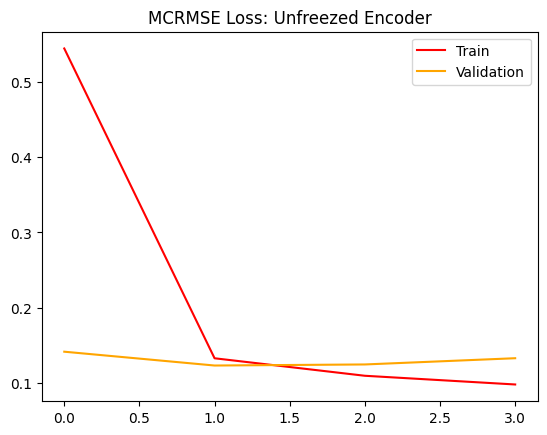

In [ ]:
plt.plot(trainer_unfreeze.train_losses, color='red')
plt.plot(trainer_unfreeze.val_losses, color='orange')
plt.title('MCRMSE Loss: Unfreezed Encoder')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **Frozen Model**  

In [ ]:
class FrozenEssayModel(nn.Module):
    def __init__(self, config, num_classes=6):
        super(FrozenEssayModel,self).__init__()
        self.model_name = config['model']
        self.encoder = AutoModel.from_pretrained(self.model_name)

        # this is how you freeze a model: the base_model is generic term for the transformer name
        for param in self.encoder.base_model.parameters():
            param.requires_grad = False

        self.dropout = nn.Dropout(config['dropout'])
        self.fc1 = nn.Linear(self.encoder.config.hidden_size, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self,inputs):
        _,outputs = self.encoder(**inputs, return_dict=False)
        outputs = self.dropout(outputs)
        outputs = self.fc1(outputs)
        outputs = self.fc2(outputs)
        return outputs

In [ ]:
model = FrozenEssayModel(config).to(device=config['device'])
trainer_freeze = Trainer(model, (train_loader, val_loader), config, freeze=True)

In [ ]:
trainer_freeze.fit()

Training...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

------------------------------ EPOCH 1 / 4 ------------------------------
train loss: 0.254777192157142
valid loss: 0.1654373659771316




  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

------------------------------ EPOCH 2 / 4 ------------------------------
train loss: 0.15500266910815724
valid loss: 0.16354798875292953




  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

------------------------------ EPOCH 3 / 4 ------------------------------
train loss: 0.14845806599727698
valid loss: 0.17123080546758612




  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

------------------------------ EPOCH 4 / 4 ------------------------------
train loss: 0.14307942287046083
valid loss: 0.13815403881729865




In [ ]:
## free up GPU memory
trainer_freeze.clear()
del model

## **results**  

In [ ]:
losses_df = pd.DataFrame({'epoch': list(range(1, config['epochs']+1)),
                          'train_loss': trainer_freeze.train_losses,
                          'val_loss': trainer_freeze.val_losses,
                          'val_mcrmse': trainer_freeze.val_mcrmse
                         })
losses_df

,epoch,train_loss,val_loss,val_mcrmse
0,1,0.254777,0.165437,0.573535
1,2,0.155003,0.163548,0.570658
2,3,0.148458,0.171231,0.583855
3,4,0.143079,0.138154,0.522377


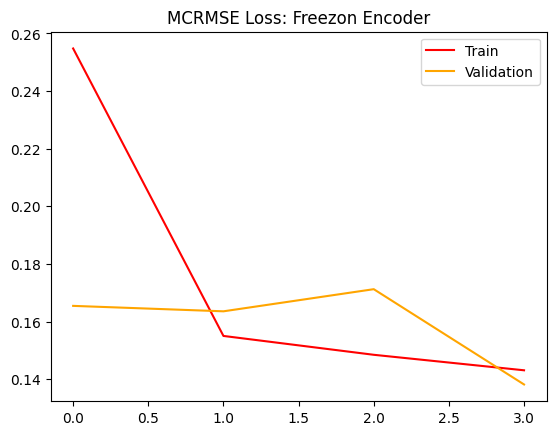

In [ ]:
plt.plot(trainer_freeze.train_losses, color='red')
plt.plot(trainer_freeze.val_losses, color='orange')
plt.title('MCRMSE Loss: Freezon Model')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **Partially Frozen Model**  

In [ ]:
class PartiallyFrozenEssayModel(nn.Module):
    def __init__(self, config, num_classes=6):
        super().__init__()
        self.model_name = config['model']
        self.model = AutoModel.from_pretrained(self.model_name)

        # this is how you freeze a model: the base_model is generic term for the transformer name
        layer_to_freeze = self.model.encoder.layer[-1]
        for param in layer_to_freeze.parameters():
            param.requires_grad = False

        self.dropout = nn.Dropout(config['dropout'])
        self.fc1 = nn.Linear(self.model.config.hidden_size, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self,inputs):
        _, outputs = self.model(**inputs, return_dict=False)
        outputs = self.dropout(outputs)
        outputs = self.fc1(outputs)
        outputs = self.fc2(outputs)
        return outputs

In [ ]:
model = PartiallyFrozenEssayModel(config).to(device=config['device'])
trainer_partially_freeze = Trainer(model, (train_loader, val_loader), config, freeze=False)

In [ ]:
trainer_partially_freeze.fit()

Training...:   0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

------------------------------ EPOCH 1 / 4 ------------------------------
train loss: 0.5880476787154164
valid loss: 0.12822345796288276




  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

------------------------------ EPOCH 2 / 4 ------------------------------
train loss: 0.1247314750692066
valid loss: 0.12241663631736016




  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

------------------------------ EPOCH 3 / 4 ------------------------------
train loss: 0.10703648661016202
valid loss: 0.11849200847197552




  0%|          | 0/196 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

------------------------------ EPOCH 4 / 4 ------------------------------
train loss: 0.09421310340035327
valid loss: 0.11977403899844812




In [ ]:
## free up GPU memory
trainer_freeze.clear()
del model

## **results**  

In [ ]:
losses_df = pd.DataFrame({'epoch': list(range(1, config['epochs']+1)),
                          'train_loss': trainer_partially_freeze.train_losses,
                          'val_loss': trainer_partially_freeze.val_losses,
                          'val_mcrmse': trainer_partially_freeze.val_mcrmse
                         })
losses_df

,epoch,train_loss,val_loss,val_mcrmse
0,1,0.588048,0.128223,0.502292
1,2,0.124731,0.122417,0.488856
2,3,0.107036,0.118492,0.481445
3,4,0.094213,0.119774,0.485035


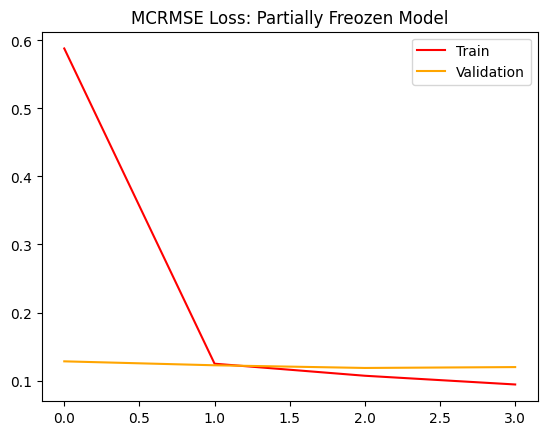

In [ ]:
plt.plot(trainer_partially_freeze.train_losses, color='red')
plt.plot(trainer_partially_freeze.val_losses, color='orange')
plt.title('MCRMSE Loss: Partially Freozen Model')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# **\<end\>**  